In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [0]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [0]:
data_train_copy = data_train.copy(deep = True)
data_test_copy = data_test.copy(deep = True)

In [0]:
# data_train

## Eda

In [12]:
data_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,2,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [0]:
data_train.Severity.replace({'Minor_Damage_And_Injuries' : 1,'Significant_Damage_And_Serious_Injuries' :2,'Significant_Damage_And_Fatalities' :3,'Highly_Fatal_And_Damaging' : 4 }, inplace=True) # add main

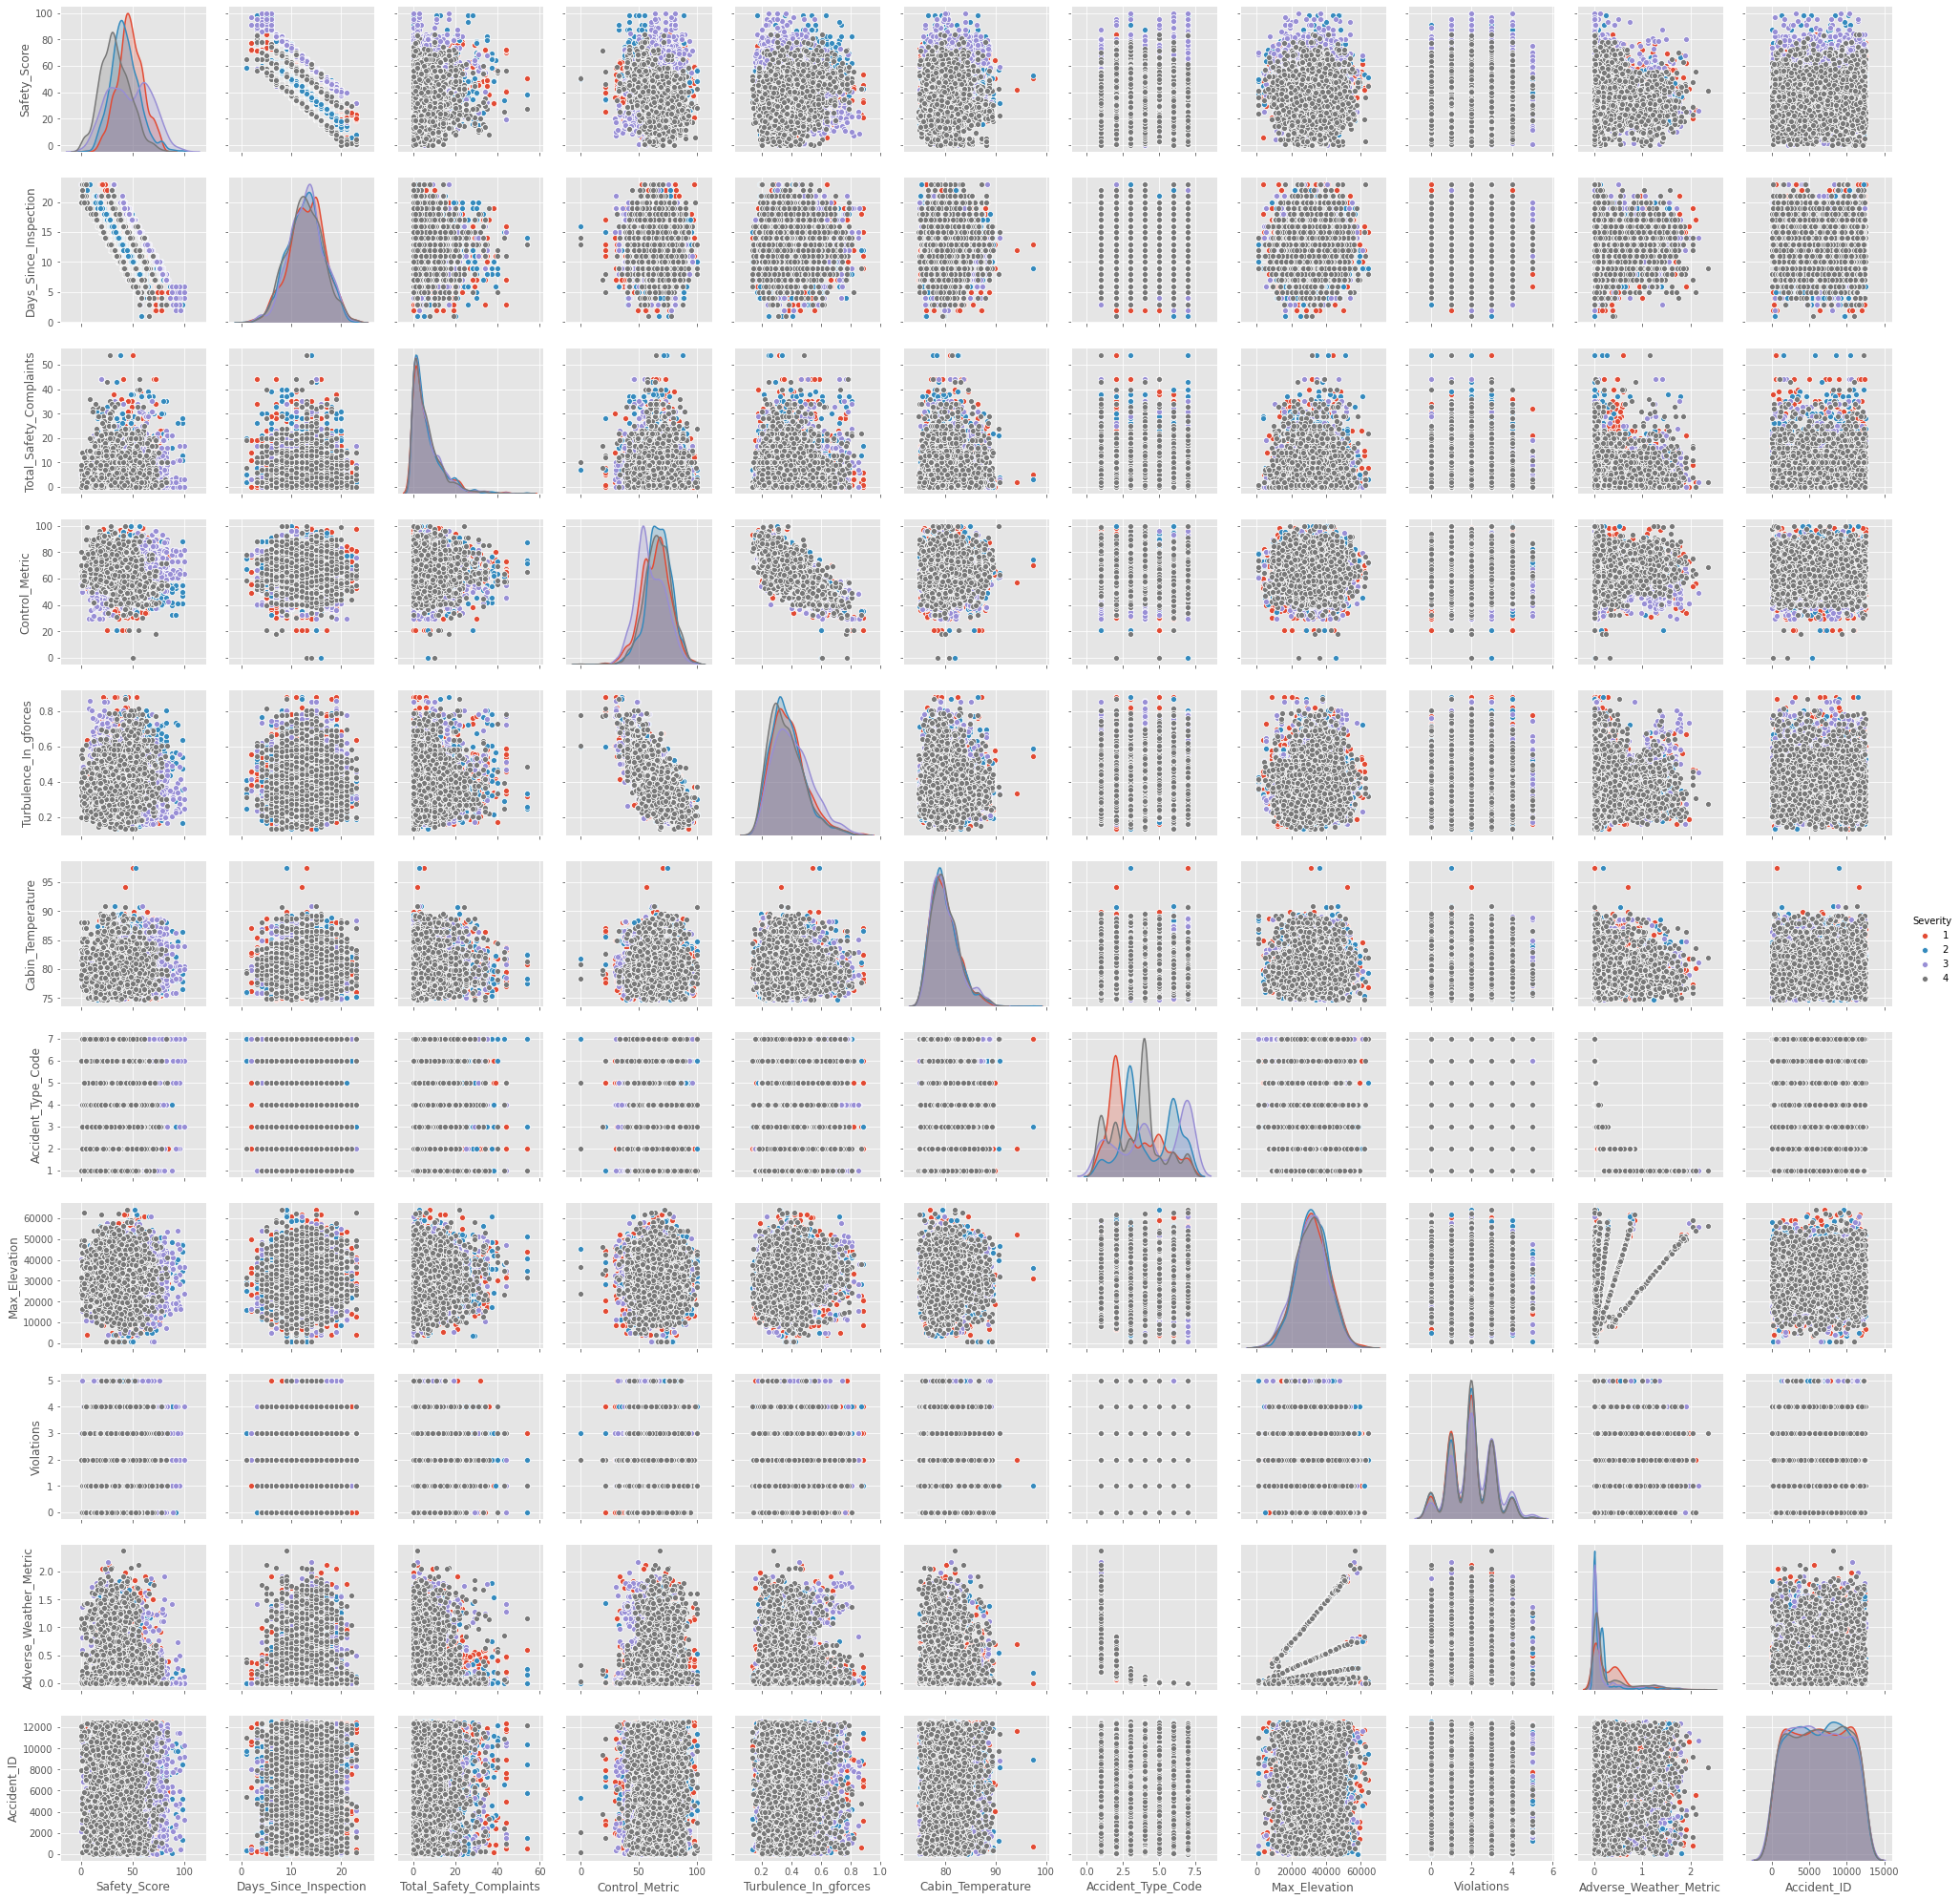

In [14]:
sns.pairplot(data_train, hue = 'Severity')

### null value imputaion

In [15]:
data_train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [0]:
data_train.info()

### features

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  int64  
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [0]:
data_train.head(25)

In [21]:
data_train.Severity.value_counts(normalize=True) 

4    0.3049
2    0.2729
1    0.2527
3    0.1695
Name: Severity, dtype: float64

In [18]:
for col in data_train.columns:
    print(col)
    print(data_train[col].value_counts())
    print('- ' * 80)
    print(data_train.groupby(col)['Severity'].value_counts(normalize = True))
    print('=' * 80)
    print()

Severity
4    3049
2    2729
1    2527
3    1695
Name: Severity, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Severity  Severity
1         1           1.0
2         2           1.0
3         3           1.0
4         4           1.0
Name: Severity, dtype: float64

Safety_Score
38.447489    42
40.776256    38
28.904110    35
42.100457    35
39.817352    33
             ..
50.639269     1
49.634703     1
73.789954     1
85.753425     1
23.333333     1
Name: Safety_Score, Length: 1175, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Safety_Score  Severity
0.000000      4           1.000000
0.456621      3           1.000000
0.913242      4           1.000000
1.141553      4           0.636364
              3           0.363636
           

In [0]:
# object
Accident_Type_Code    # changae astype
Violations


In [23]:
data_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

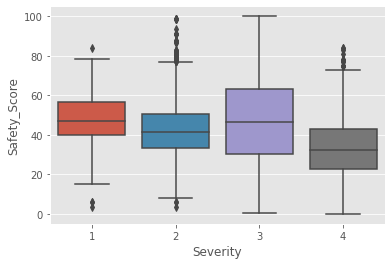

In [32]:
sns.boxplot(x="Severity", y="Safety_Score", data=data_train)

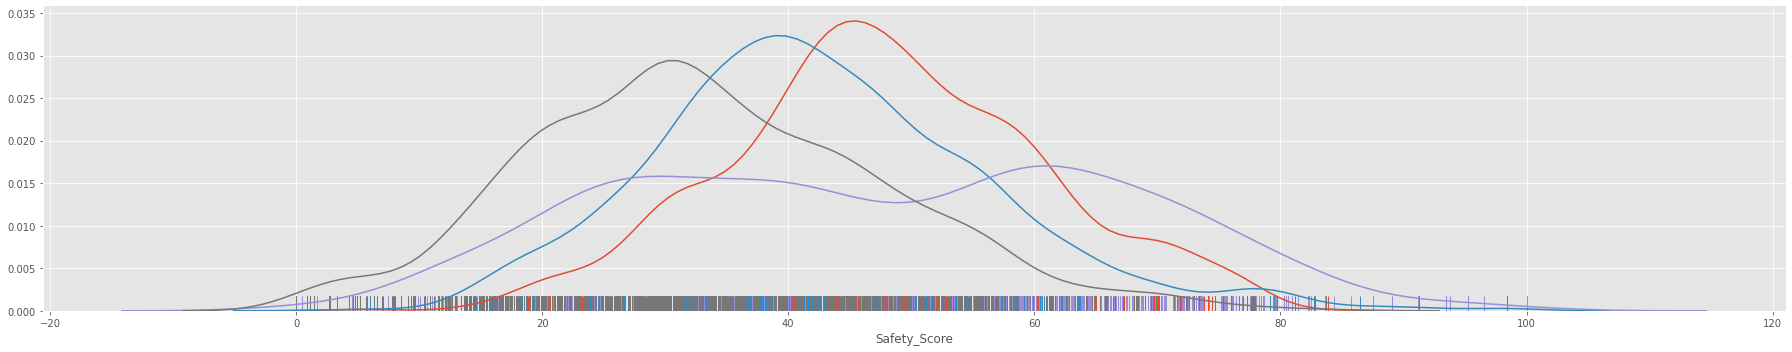

In [24]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl = g.map(sns.distplot, "Safety_Score",  hist=False, rug=True)


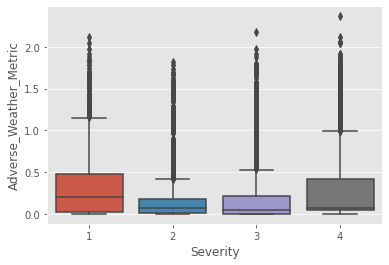

In [33]:
sns.boxplot(x="Severity", y="Adverse_Weather_Metric", data=data_train)   

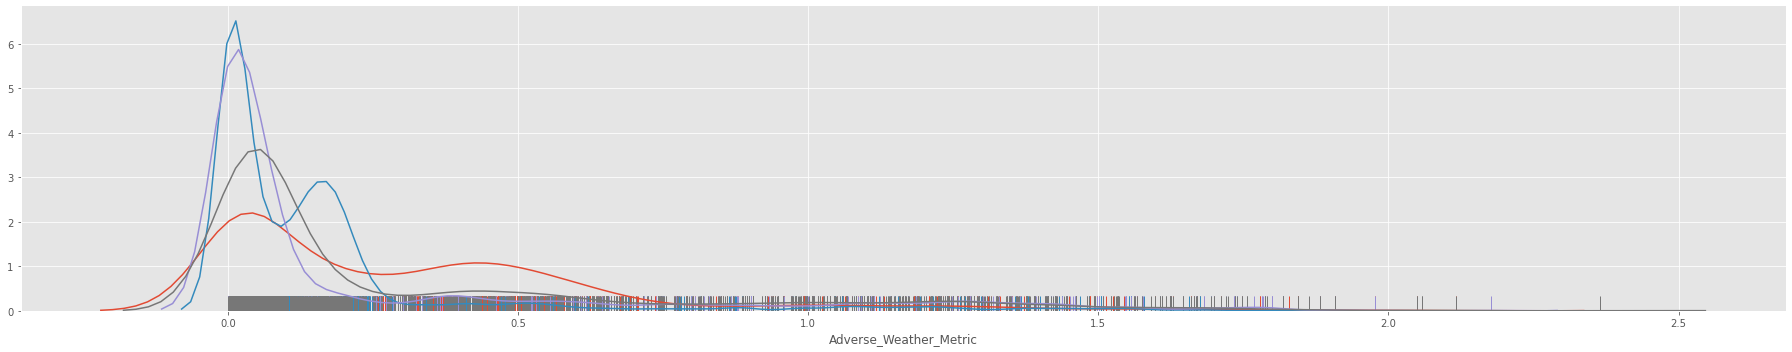

In [34]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Adverse_Weather_Metric",  hist=False, rug=True)


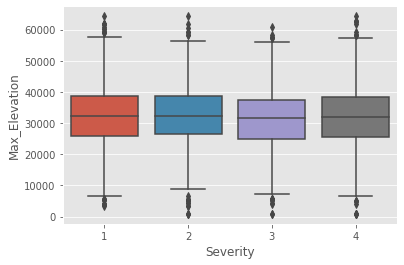

In [39]:
sns.boxplot(x="Severity", y="Max_Elevation", data=data_train)   

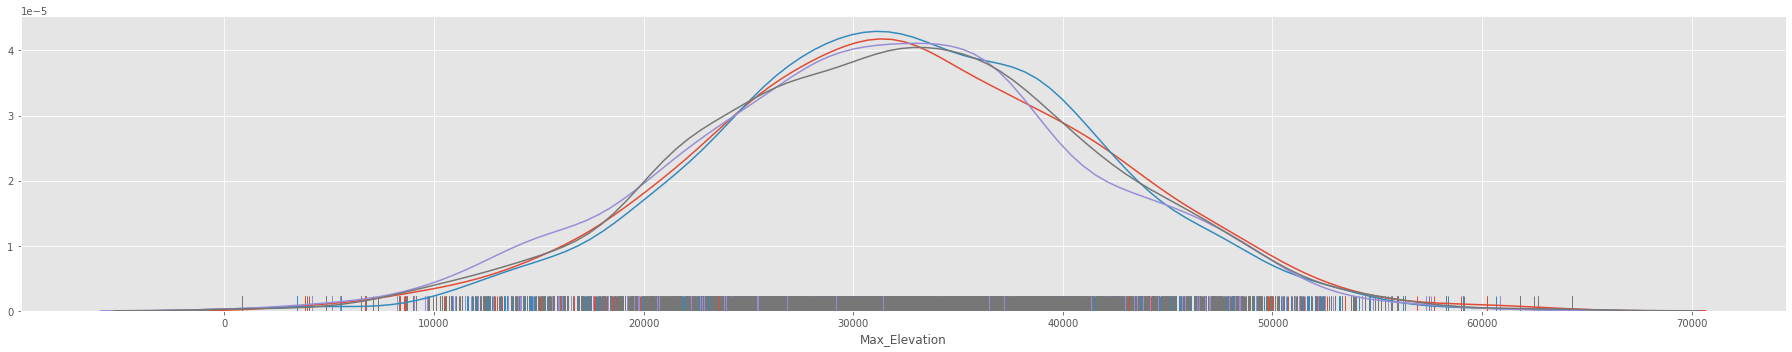

In [40]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Max_Elevation",  hist=False, rug=True)


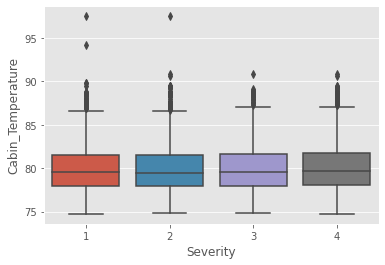

In [41]:
sns.boxplot(x="Severity", y="Cabin_Temperature", data=data_train)   

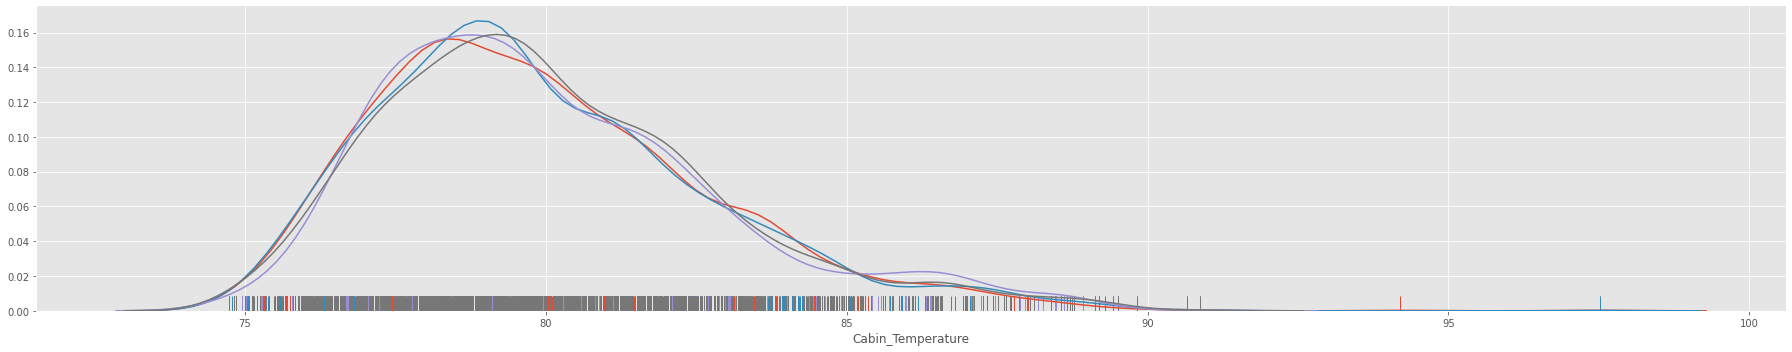

In [42]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Cabin_Temperature",  hist=False, rug=True)


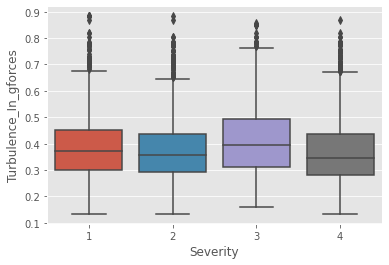

In [43]:
sns.boxplot(x="Severity", y="Turbulence_In_gforces", data=data_train)   

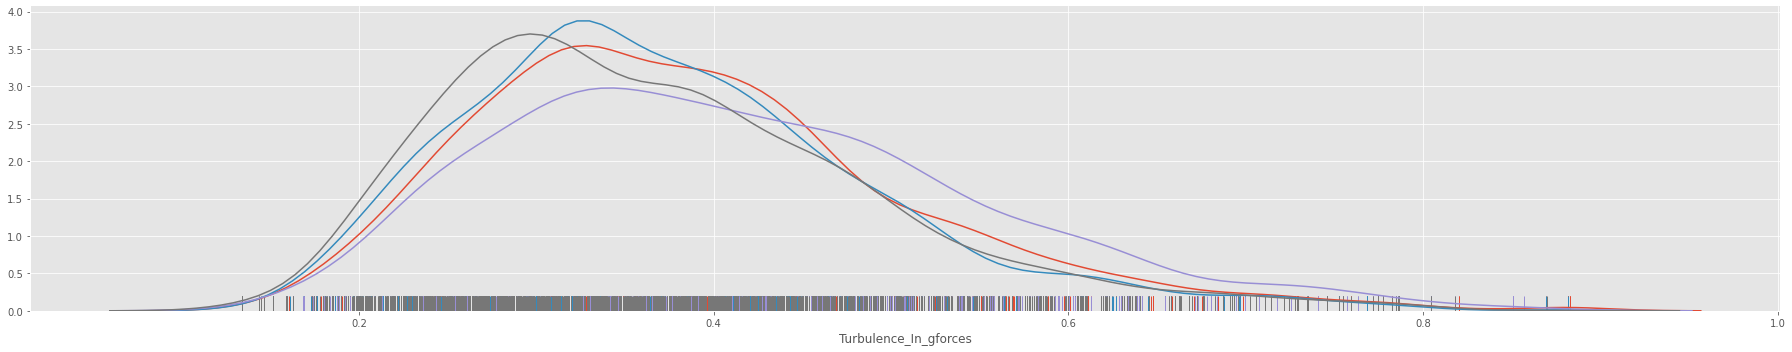

In [44]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Turbulence_In_gforces",  hist=False, rug=True)

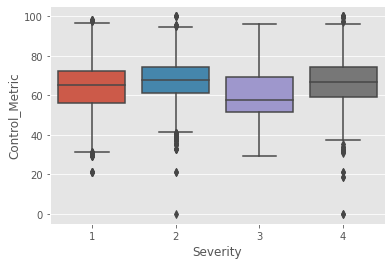

In [45]:
sns.boxplot(x="Severity", y="Control_Metric", data=data_train)   

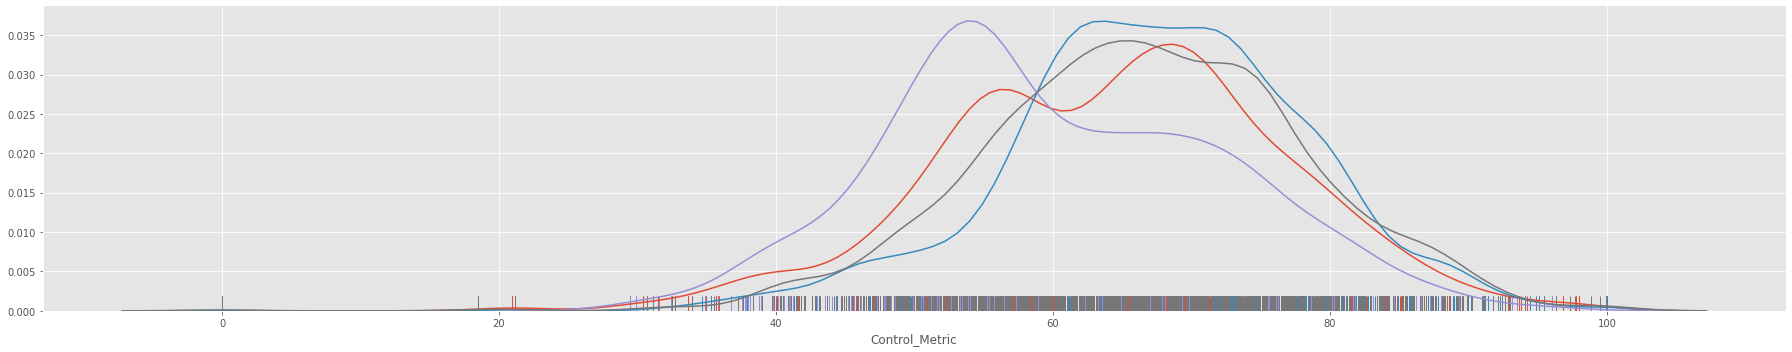

In [46]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Control_Metric",  hist=False, rug=True)


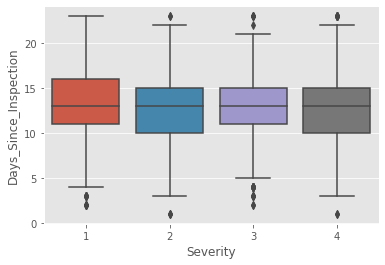

In [47]:
sns.boxplot(x="Severity", y="Days_Since_Inspection", data=data_train)   

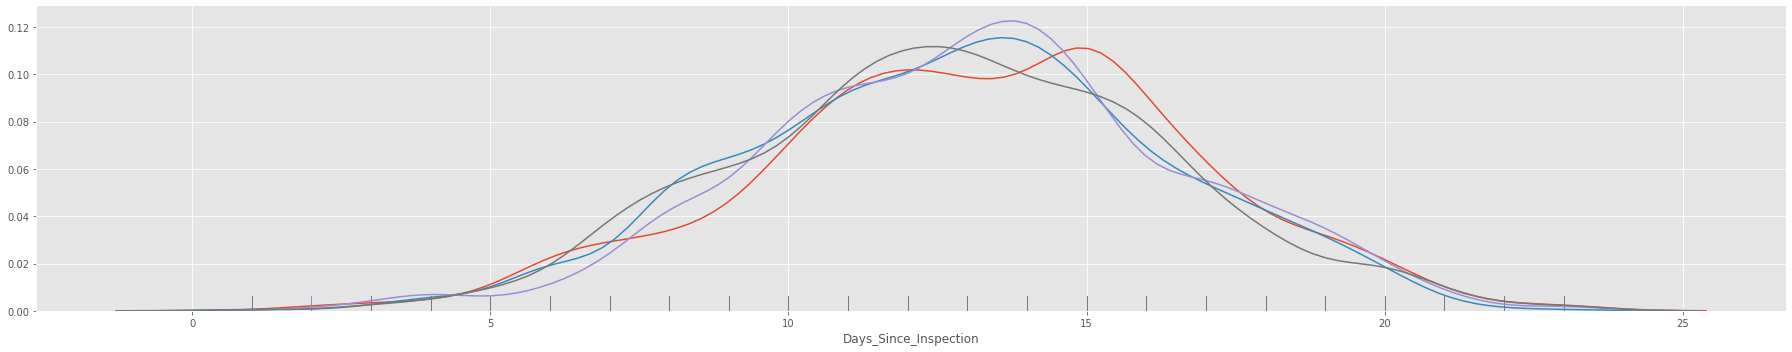

In [48]:
g = sns.FacetGrid(data_train, hue="Severity", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Days_Since_Inspection",  hist=False, rug=True)


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [0]:
X = data_train.drop(columns='Severity')

In [0]:
# X_le = label_enc(X)

In [0]:
# X_ty = X_le.astype('float64')

In [52]:
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                      1032.602857
Safety_Score                  1.996249
Days_Since_Inspection         1.933373
Total_Safety_Complaints       1.011492
Control_Metric                1.708144
Turbulence_In_gforces         1.719770
Cabin_Temperature             1.003299
Accident_Type_Code            2.428287
Max_Elevation                 1.089594
Violations                    1.006217
Adverse_Weather_Metric        2.416512
Accident_ID                   1.000749
dtype: float64

In [0]:
y_data = data_train.Severity

In [0]:
y_multiclass = y_data.map({1:[1,0,0,0],2:[0,1,0,0],3:[0,0,1,0],4:[0,0,0,1]})

In [0]:
# import statsmodels.api as sm

In [0]:
# model = sm.Logit(y_multiclass, X)
# model_fit = model.fit()

In [0]:
# model_fit.summary()

In [0]:
data_train = data_train.drop(columns= ['Accident_ID'])   #add main

data_train['Accident_Type_Code'] = data_train['Accident_Type_Code'].astype('object')
data_train['Violations'] = data_train['Violations'].astype('object')


In [71]:
data_train.select_dtypes(exclude='object').columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric'],
      dtype='object')

In [72]:
data_train.select_dtypes('object').columns

Index(['Accident_Type_Code', 'Violations'], dtype='object')

###normalize

## func

In [0]:
def type_casting(data):
    df = data
    df['first_payment_date'] = pd.to_datetime(df.first_payment_date, format='%Y%m%d')
    df['origination_date'] = pd.to_datetime(df.origination_date, format='%Y%m%d')
#     df['test_type'] = df['test_type'].astype('object')
#     df['difficulty_level'] = df['difficulty_level'].astype('object')
    
    return(df)

def drop(data):
#     df = data.copy()
    df = data.drop(columns = ['loan_id','first_payment_date','origination_date'])
    
    return df

In [0]:
def label_enc(dataset):
    from sklearn.preprocessing import LabelEncoder
    df1 = dataset.copy()
    df_categorical = df1.select_dtypes(include=['object'])

    # apply Label encoder to df_categorical

    le = LabelEncoder()
    df_categorical = df_categorical.apply(le.fit_transform)
    df_categorical = df_categorical.astype('object')

    # concat df_categorical with original df AFTER LABEL ENCODING
    df1 = df1.drop(df_categorical.columns, axis=1)
    df1 = pd.concat([df1, df_categorical], axis=1)
    
    df_categorical =0
    return df1

def impute(data):
    from sklearn.impute import SimpleImputer
    
    si = SimpleImputer()
    array = si.fit_transform(data)
    
    return array
    

def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = StandardScaler()
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

def over_sample(X_train, y_train, smote = True):
    X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

In [0]:
def clf_tune(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

## model

### py

In [0]:
pip install pycaret

In [0]:
from pycaret.classification import *

In [75]:
se = setup(data_train, target = 'Severity',normalize = False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5935
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(10000, 11)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [76]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.958000,0.000000,0.959400,0.958200,0.958000,0.943300
1,Light Gradient Boosting Machine,0.954700,0.000000,0.956200,0.955000,0.954700,0.938900
2,Decision Tree Classifier,0.866500,0.000000,0.862700,0.880800,0.867400,0.818600
3,Gradient Boosting Classifier,0.852700,0.000000,0.854900,0.858900,0.853800,0.801400
4,Extreme Gradient Boosting,0.840100,0.000000,0.842500,0.848400,0.841500,0.784400
5,Random Forest Classifier,0.798500,0.000000,0.796400,0.798900,0.798200,0.727400
6,Extra Trees Classifier,0.740500,0.000000,0.734100,0.741900,0.740300,0.648500
7,Ada Boost Classifier,0.619500,0.000000,0.585900,0.610200,0.609300,0.480000
8,Ridge Classifier,0.606100,0.000000,0.577100,0.600200,0.597800,0.461900
9,Linear Discriminant Analysis,0.604400,0.000000,0.577200,0.597800,0.598500,0.461200


In [77]:
tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8686,0.0,0.8650,0.8688,0.8685,0.8222
1,0.8500,0.0,0.8478,0.8504,0.8498,0.7971
2,0.8471,0.0,0.8406,0.8489,0.8476,0.7932
3,0.8600,0.0,0.8630,0.8617,0.8605,0.8111
4,0.8357,0.0,0.8346,0.8366,0.8356,0.7780
5,0.8557,0.0,0.8566,0.8587,0.8558,0.8052
6,0.8400,0.0,0.8413,0.8414,0.8403,0.7838
7,0.8500,0.0,0.8555,0.8529,0.8499,0.7979
8,0.8500,0.0,0.8475,0.8506,0.8501,0.7971
9,0.8355,0.0,0.8295,0.8374,0.8358,0.7773


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                             

In [78]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9157,0.0,0.9143,0.9163,0.9158,0.8859
1,0.9000,0.0,0.9030,0.9005,0.8999,0.8648
2,0.9114,0.0,0.9089,0.9123,0.9112,0.8800
3,0.9000,0.0,0.8989,0.9014,0.9000,0.8645
4,0.8771,0.0,0.8808,0.8782,0.8768,0.8341
5,0.9214,0.0,0.9212,0.9234,0.9218,0.8937
6,0.9086,0.0,0.9069,0.9096,0.9085,0.8762
7,0.9029,0.0,0.9044,0.9029,0.9028,0.8687
8,0.8971,0.0,0.8968,0.8993,0.8975,0.8607
9,0.8898,0.0,0.8853,0.8898,0.8894,0.8508


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features=17,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=5935,
                                        

In [84]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5543,0.0,0.4974,0.5203,0.5186,0.3858
1,0.5471,0.0,0.4901,0.5058,0.5124,0.3757
2,0.5600,0.0,0.5015,0.5189,0.5253,0.3939
3,0.5329,0.0,0.4750,0.4813,0.4946,0.3549
4,0.5214,0.0,0.4661,0.4679,0.4838,0.3400
5,0.5514,0.0,0.4926,0.4860,0.5154,0.3828
6,0.5086,0.0,0.4541,0.4510,0.4656,0.3209
7,0.6086,0.0,0.5673,0.5899,0.5925,0.4637
8,0.5400,0.0,0.4826,0.4879,0.5047,0.3659
9,0.5336,0.0,0.4758,0.4900,0.4940,0.3564


OneVsRestClassifier(estimator=LogisticRegression(C=9.361, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=5935,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [80]:
tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9543,0.0,0.9531,0.9544,0.9543,0.9382
1,0.9471,0.0,0.9493,0.9473,0.9471,0.9286
2,0.9671,0.0,0.9698,0.9673,0.9671,0.9556
3,0.9700,0.0,0.9699,0.9700,0.9700,0.9595
4,0.9514,0.0,0.9526,0.9519,0.9513,0.9345
5,0.9586,0.0,0.9599,0.9595,0.9586,0.9441
6,0.9500,0.0,0.9491,0.9503,0.9501,0.9325
7,0.9471,0.0,0.9487,0.9474,0.9470,0.9287
8,0.9543,0.0,0.9546,0.9544,0.9543,0.9382
9,0.9557,0.0,0.9587,0.9563,0.9557,0.9402


OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=0,
                                            learning_rate=0.06,
                                            max_delta_step=0, max_depth=50,
                                            min_child_weight=3, missing=None,
                                            n_estimators=190, n_jobs=-1,
                                            nthread=None, num_class=4,
                                            objective='multi:softprob',
                                            random_state=5935, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None,
                                            subsample=0.9, ver

In [81]:
tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9500,0.0,0.9498,0.9504,0.9500,0.9325
1,0.9614,0.0,0.9644,0.9615,0.9613,0.9479
2,0.9571,0.0,0.9595,0.9573,0.9571,0.9421
3,0.9614,0.0,0.9621,0.9615,0.9614,0.9479
4,0.9514,0.0,0.9542,0.9518,0.9513,0.9345
5,0.9657,0.0,0.9668,0.9663,0.9657,0.9537
6,0.9457,0.0,0.9447,0.9459,0.9458,0.9267
7,0.9500,0.0,0.9509,0.9501,0.9499,0.9325
8,0.9543,0.0,0.9544,0.9543,0.9543,0.9382
9,0.9514,0.0,0.9547,0.9523,0.9514,0.9344


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.3, max_depth=50,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=150,
                                             n_jobs=-1, num_leaves=40,
                                             objective=None, random_state=5935,
                                             reg_alpha=0.6, reg_lambda=0.2,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0),
  

In [86]:
tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9657,0.0,0.9654,0.9659,0.9658,0.9537
1,0.9571,0.0,0.9607,0.9572,0.9570,0.9421
2,0.9629,0.0,0.9636,0.9631,0.9629,0.9498
3,0.9571,0.0,0.9592,0.9573,0.9571,0.9421
4,0.9586,0.0,0.9614,0.9588,0.9584,0.9441
5,0.9614,0.0,0.9640,0.9621,0.9614,0.9480
6,0.9543,0.0,0.9556,0.9545,0.9543,0.9383
7,0.9429,0.0,0.9459,0.9430,0.9427,0.9229
8,0.9586,0.0,0.9582,0.9586,0.9585,0.9440
9,0.9585,0.0,0.9607,0.9591,0.9585,0.9440


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f328c5df710>,
                    n_jobs=None)

In [87]:
tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4786,0.0,0.4678,0.4786,0.4771,0.2925
1,0.4614,0.0,0.4495,0.4596,0.4596,0.2697
2,0.4743,0.0,0.4557,0.4709,0.4714,0.2851
3,0.4743,0.0,0.4631,0.4759,0.4732,0.2854
4,0.4986,0.0,0.4879,0.4979,0.4976,0.3200
5,0.5071,0.0,0.4921,0.5065,0.5056,0.3308
6,0.4857,0.0,0.4752,0.4898,0.4854,0.3010
7,0.4457,0.0,0.4290,0.4427,0.4427,0.2458
8,0.4871,0.0,0.4720,0.4874,0.4851,0.3026
9,0.4778,0.0,0.4624,0.4780,0.4762,0.2899


OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=6,
                                                   p=2, weights='distance'),
                    n_jobs=None)

In [183]:
se = setup(data_train, target = 'Severity',normalize = True,silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2702
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(10000, 11)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [184]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8614,0.0,0.8616,0.8662,0.8616,0.8120
1,0.8686,0.0,0.8681,0.8767,0.8691,0.8216
2,0.9086,0.0,0.9060,0.9137,0.9089,0.8760
3,0.8900,0.0,0.8853,0.9015,0.8906,0.8505
4,0.8900,0.0,0.8892,0.8966,0.8902,0.8508
5,0.8886,0.0,0.8884,0.8946,0.8886,0.8490
6,0.9186,0.0,0.9182,0.9234,0.9190,0.8896
7,0.8886,0.0,0.8869,0.8938,0.8872,0.8491
8,0.8714,0.0,0.8710,0.8743,0.8711,0.8259
9,0.8684,0.0,0.8630,0.8720,0.8675,0.8216


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=15,
                                                     max_features=17,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=2702,
                                           

In [185]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5814,0.0,0.5648,0.5877,0.5834,0.4357
1,0.6186,0.0,0.5927,0.6196,0.6181,0.4840
2,0.6214,0.0,0.6007,0.6209,0.6211,0.4880
3,0.6043,0.0,0.5859,0.6090,0.6061,0.4665
4,0.6100,0.0,0.5762,0.6012,0.6050,0.4711
5,0.5857,0.0,0.5506,0.5733,0.5776,0.4366
6,0.6157,0.0,0.5962,0.6209,0.6174,0.4811
7,0.6300,0.0,0.6073,0.6423,0.6350,0.5022
8,0.6257,0.0,0.6024,0.6292,0.6273,0.4949
9,0.6037,0.0,0.5817,0.6088,0.6051,0.4652


OneVsRestClassifier(estimator=LogisticRegression(C=7.3180000000000005,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=2702,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [189]:
se = setup(data_train, target = 'Severity',normalize = False,transformation = True, silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3022
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(10000, 11)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [190]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8943,0.0,0.8953,0.8978,0.8944,0.8567
1,0.8757,0.0,0.8758,0.8761,0.8756,0.8321
2,0.8714,0.0,0.8732,0.8718,0.8712,0.8260
3,0.8914,0.0,0.8925,0.8929,0.8917,0.8530
4,0.8700,0.0,0.8712,0.8702,0.8701,0.8243
5,0.8843,0.0,0.8845,0.8848,0.8841,0.8435
6,0.8914,0.0,0.8933,0.8922,0.8913,0.8530
7,0.8543,0.0,0.8567,0.8569,0.8544,0.8028
8,0.8800,0.0,0.8866,0.8809,0.8798,0.8383
9,0.8698,0.0,0.8686,0.8721,0.8698,0.8236


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=11,
                                                     max_features=15,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=3022,
                                        

In [191]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6229,0.0,0.5952,0.6183,0.6201,0.4888
1,0.6143,0.0,0.5864,0.6163,0.6145,0.4791
2,0.6157,0.0,0.5855,0.6113,0.6130,0.4792
3,0.6029,0.0,0.5741,0.6001,0.6010,0.4623
4,0.5943,0.0,0.5716,0.6016,0.5960,0.4529
5,0.6200,0.0,0.5956,0.6282,0.6223,0.4876
6,0.5914,0.0,0.5600,0.5920,0.5899,0.4467
7,0.6300,0.0,0.6023,0.6281,0.6283,0.4985
8,0.6000,0.0,0.5674,0.5973,0.5982,0.4583
9,0.6195,0.0,0.5944,0.6241,0.6212,0.4868


OneVsRestClassifier(estimator=LogisticRegression(C=9.183,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=3022,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [192]:
se = setup(data_train, target = 'Severity',normalize = True,transformation = True, silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8156
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(10000, 11)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [194]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8929,0.0,0.8897,0.8969,0.8931,0.8547
1,0.8900,0.0,0.8907,0.8954,0.8898,0.8510
2,0.8857,0.0,0.8850,0.8892,0.8858,0.8453
3,0.8686,0.0,0.8645,0.8757,0.8679,0.8216
4,0.8857,0.0,0.8872,0.8914,0.8859,0.8452
5,0.8829,0.0,0.8819,0.8892,0.8827,0.8410
6,0.8643,0.0,0.8659,0.8681,0.8644,0.8162
7,0.9029,0.0,0.9031,0.9065,0.9032,0.8683
8,0.8843,0.0,0.8844,0.8908,0.8843,0.8431
9,0.8827,0.0,0.8748,0.8882,0.8824,0.8406


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=16,
                                                     max_features=18,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8156,
                                        

In [195]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5900,0.0,0.5669,0.5955,0.5923,0.4472
1,0.6014,0.0,0.5784,0.6036,0.6024,0.4622
2,0.6000,0.0,0.5678,0.5922,0.5952,0.4569
3,0.6271,0.0,0.5975,0.6220,0.6241,0.4949
4,0.6129,0.0,0.5917,0.6208,0.6157,0.4779
5,0.6257,0.0,0.6019,0.6277,0.6265,0.4948
6,0.6043,0.0,0.5763,0.5993,0.6011,0.4635
7,0.6000,0.0,0.5654,0.5918,0.5947,0.4566
8,0.6157,0.0,0.5905,0.6177,0.6157,0.4799
9,0.5880,0.0,0.5656,0.5900,0.5889,0.4434


OneVsRestClassifier(estimator=LogisticRegression(C=1.571,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=8156,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

### ml

In [0]:
data_train.head(5)

#### with raw data

#####other than lr

In [0]:
data_raw = pd.get_dummies(data_train )   ## add main

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report

In [0]:
X = data_raw.drop(columns=['Severity']).values
y = data_raw.Severity.values

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8, stratify = y)

In [0]:
def clf_base(model1):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report
    
    mod = model1()
    mod.fit(X_train, y_train)

    y_predict = mod.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))

    print(classification_report(y_val,y_predict))    
    # fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    # print('auc :',auc(fpr, tpr))
    # print('recall :', recall_score(y_val, y_predict))

DecisionTreeClassifier

In [119]:
clf_base(DecisionTreeClassifier)

[[449  16  13  27]
 [ 22 505   7  12]
 [ 17   7 304  11]
 [  6   8  16 580]]
0.919
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       505
           2       0.94      0.92      0.93       546
           3       0.89      0.90      0.90       339
           4       0.92      0.95      0.94       610

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [107]:
model = DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features=17,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=5935,
                                                     splitter='best')

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[466  13  15  11]
 [ 31 488   5  22]
 [ 11   4 317   7]
 [ 15  14  20 561]]
0.916
              precision    recall  f1-score   support

           1       0.89      0.92      0.91       505
           2       0.94      0.89      0.92       546
           3       0.89      0.94      0.91       339
           4       0.93      0.92      0.93       610

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [110]:
params = dict(criterion = ['gini','entropy'],
              max_features=[15,17,20,None],
              max_depth=[15,20,25,30,None],
              min_samples_split=[2,5,7],
              min_samples_leaf=[5,10]
              )

clf = DecisionTreeClassifier(
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=61,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [0]:
# model.cv_results_ 

In [111]:
model.best_score_, model.best_params_

(0.92975,
 {'criterion': 'entropy',
  'max_depth': 15,
  'max_features': 20,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [254]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',           ## add main
                       max_depth=11, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.05,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5935, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[478  11   6  10]
 [ 24 505   3  14]
 [  4   5 324   6]
 [ 15  11  18 566]]
0.9365
              precision    recall  f1-score   support

           1       0.92      0.95      0.93       505
           2       0.95      0.92      0.94       546
           3       0.92      0.96      0.94       339
           4       0.95      0.93      0.94       610

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



RandomForestClassifier

In [120]:
clf_base(RandomForestClassifier)

[[433  38  22  12]
 [ 35 480   5  26]
 [ 38   9 289   3]
 [ 36  26  13 535]]
0.8685
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       505
           2       0.87      0.88      0.87       546
           3       0.88      0.85      0.87       339
           4       0.93      0.88      0.90       610

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [131]:
model =RandomForestClassifier(bootstrap=False,ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     oob_score=False,
                                                     random_state=5935,
                                                     verbose=0,
                                                     warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    

[[439  32  22  12]
 [ 39 480   5  22]
 [ 30   7 301   1]
 [ 33  24  11 542]]
0.881


In [133]:
params = dict(criterion = ['entropy','gini'],
              max_features=[15,'sqrt','log2',None],
              max_depth=[20,15,30,40,None]
             
              )

clf = RandomForestClassifier(min_samples_split=5,min_samples_leaf=5,n_estimators = 100,n_jobs=-1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=61,
                                    

In [134]:
print(model.best_score_, model.best_params_)

0.944 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 15}


In [174]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,       ##add main
                       criterion='entropy', max_depth=12, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[480   9   3  13]
 [ 19 513   1  13]
 [  5   4 328   2]
 [  3   5  19 583]]
0.952
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       505
           2       0.97      0.94      0.95       546
           3       0.93      0.97      0.95       339
           4       0.95      0.96      0.95       610

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



ExtraTreesClassifier

In [178]:
clf_base(ExtraTreesClassifier)

[[377  62  32  34]
 [ 56 427  13  50]
 [ 41  19 245  34]
 [ 58  61  12 479]]
0.764
              precision    recall  f1-score   support

           1       0.71      0.75      0.73       505
           2       0.75      0.78      0.77       546
           3       0.81      0.72      0.76       339
           4       0.80      0.79      0.79       610

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



In [0]:
model =ExtraTreesClassifier(n_estimators=200, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9778  224]
 [ 604  356]]
0.9244663382594417
auc : 0.6742189062187562
recall : 0.37083333333333335


In [0]:
params = dict(min_samples_split=[5,10],
              max_features=[20,None],
              max_depth=[40,60,70,None],
              )

clf = ExtraTreesClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=61,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

In [0]:
print(model.best_score_, model.best_params_)

0.338179992797669 {'max_depth': 40, 'max_features': None, 'min_samples_split': 5}


XGBClassifier

In [180]:
clf_base(XGBClassifier)

[[432  39  16  18]
 [ 56 467   5  18]
 [ 19  16 294  10]
 [ 79   8  14 509]]
0.851
              precision    recall  f1-score   support

           1       0.74      0.86      0.79       505
           2       0.88      0.86      0.87       546
           3       0.89      0.87      0.88       339
           4       0.92      0.83      0.87       610

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [210]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,            ## add main
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=6,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

[[484  11   2   8]
 [ 16 519   2   9]
 [  3   2 328   6]
 [  2   3  16 589]]
0.96
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       505
           2       0.97      0.95      0.96       546
           3       0.94      0.97      0.95       339
           4       0.96      0.97      0.96       610

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



AdaBoostClassifier

In [181]:
clf_base(AdaBoostClassifier)

[[243 143  24  95]
 [ 42 420  49  35]
 [ 23 162   9 145]
 [ 77  72  33 428]]
0.55
              precision    recall  f1-score   support

           1       0.63      0.48      0.55       505
           2       0.53      0.77      0.63       546
           3       0.08      0.03      0.04       339
           4       0.61      0.70      0.65       610

    accuracy                           0.55      2000
   macro avg       0.46      0.49      0.47      2000
weighted avg       0.50      0.55      0.51      2000



In [211]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    


[[207 179  32  87]
 [ 50 428  40  28]
 [ 16 166  11 146]
 [ 66  76  31 437]]
0.5415


In [0]:
from catboost import CatBoostClassifier

In [226]:
model = CatBoostClassifier(iterations=200, learning_rate=.5, depth=10, l2_leaf_reg=2,
                           model_size_reg=None, rsm=None, loss_function=None, border_count=None, 
                           feature_border_type=None, per_float_feature_quantization=None, input_borders=None, 
                           output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None,
                           nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, 
                           leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None,
                           best_model_min_trees=None, verbose=None, silent=None, logging_level=None,
                           metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, 
                           max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None,
                           classes_count=None, class_weights=None, class_names=None, one_hot_max_size=None, 
                           random_strength=None, name=None, ignored_features=None, train_dir=None,
                           custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, 
                           save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None,
                           used_ram_limit=None, gpu_ram_part=None, pinned_memory_size=None, allow_writing_files=None, 
                           final_ctr_computation_mode=None, approx_on_full_history=None, boosting_type=None,
                           simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, ctr_description=None, 
                           ctr_target_border_count=None, task_type=None, device_config=None, devices=None, 
                           bootstrap_type=None, subsample=None, mvs_reg=None, sampling_unit=None, 
                           sampling_frequency=None, dev_score_calc_obj_block_size=None, dev_efb_max_buckets=None,
                           sparse_features_conflict_fraction=None, max_depth=None, n_estimators=None, 
                           num_boost_round=None, num_trees=None, colsample_bylevel=None, random_state=None,
                           reg_lambda=None, objective=None, eta=None, max_bin=None, scale_pos_weight=None,
                           gpu_cat_features_storage=None, data_partition=None, metadata=None,
                           early_stopping_rounds=None, cat_features=None, grow_policy=None,
                           min_data_in_leaf=None, min_child_samples=None, max_leaves=None, 
                           num_leaves=None, score_function=None, leaf_estimation_backtracking=None,
                           ctr_history_unit=None, monotone_constraints=None, model_shrink_rate=None, 
                           boost_from_average=None, text_features=None, dictionaries=None, text_processing=None)


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


0:	learn: 0.7175175	total: 85.6ms	remaining: 17s
1:	learn: 0.5502475	total: 170ms	remaining: 16.9s
2:	learn: 0.4304403	total: 253ms	remaining: 16.6s
3:	learn: 0.3334917	total: 340ms	remaining: 16.6s
4:	learn: 0.3033243	total: 421ms	remaining: 16.4s
5:	learn: 0.2903127	total: 505ms	remaining: 16.3s
6:	learn: 0.2542810	total: 593ms	remaining: 16.4s
7:	learn: 0.2310605	total: 688ms	remaining: 16.5s
8:	learn: 0.2172226	total: 771ms	remaining: 16.4s
9:	learn: 0.2086913	total: 856ms	remaining: 16.3s
10:	learn: 0.1994682	total: 938ms	remaining: 16.1s
11:	learn: 0.1931312	total: 1.02s	remaining: 16s
12:	learn: 0.1823025	total: 1.11s	remaining: 15.9s
13:	learn: 0.1698379	total: 1.19s	remaining: 15.8s
14:	learn: 0.1638878	total: 1.27s	remaining: 15.7s
15:	learn: 0.1590679	total: 1.36s	remaining: 15.6s
16:	learn: 0.1547849	total: 1.44s	remaining: 15.5s
17:	learn: 0.1500298	total: 1.52s	remaining: 15.4s
18:	learn: 0.1436973	total: 1.61s	remaining: 15.4s
19:	learn: 0.1370311	total: 1.71s	remaining:

##### lr

In [257]:
from sklearn.linear_model import LogisticRegression
clf_base(LogisticRegression)

[[198 178  28 101]
 [126 179  15 226]
 [157  43  13 126]
 [100  82  20 408]]
0.399
              precision    recall  f1-score   support

           1       0.34      0.39      0.36       505
           2       0.37      0.33      0.35       546
           3       0.17      0.04      0.06       339
           4       0.47      0.67      0.55       610

    accuracy                           0.40      2000
   macro avg       0.34      0.36      0.33      2000
weighted avg       0.36      0.40      0.37      2000



In [258]:
data_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,2,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [0]:
X = data_train.drop('Severity',axis =1)
y = data_train.Severity

X = pd.get_dummies(X)

In [0]:
y_multiclass = y.map({1:[1,0,0,0],2:[0,1,0,0],3:[0,0,1,0],4:[0,0,0,1]})

In [0]:
X_train, X_val, y_train,y_val = train_test_split(X,y, stratify = y)

In [287]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='newton-cg', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train,y_train)
y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[408 134  81   9]
 [ 61 464  68  89]
 [ 52  55 133 184]
 [ 71 116  24 551]]
0.6224
              precision    recall  f1-score   support

           1       0.69      0.65      0.67       632
           2       0.60      0.68      0.64       682
           3       0.43      0.31      0.36       424
           4       0.66      0.72      0.69       762

    accuracy                           0.62      2500
   macro avg       0.60      0.59      0.59      2500
weighted avg       0.61      0.62      0.62      2500



In [0]:
def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    # df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = MinMaxScaler()   # change accordingly
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        # df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

In [0]:
X_train_, X_val_ = standardize(dataset = X_train, X_test = X_val, test = True)

In [0]:
X_train_

In [303]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='newton-cg', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train_,y_train)
y_predict = model.predict(X_val_)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[  0   0 317 315]
 [  0   0  61 621]
 [  0   0 114 310]
 [  1   0 230 531]]
0.258
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       632
           2       0.00      0.00      0.00       682
           3       0.16      0.27      0.20       424
           4       0.30      0.70      0.42       762

    accuracy                           0.26      2500
   macro avg       0.11      0.24      0.15      2500
weighted avg       0.12      0.26      0.16      2500

